In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inputs

In [119]:
input_excel_filepath = './Input_FE_Assignment_1/Powells Creek AMS.xlsx'
input_sheet_name = 'Sheet1'
output_dir = './Output_FE_Assignment_1/'
# case 1: 11-year data
input_1st_sample = [1960, 1971]
input_2nd_sample = [1970, 1981]
input_3rd_sample = [1980, 1991]
# case 2: 10-year data - forward
input_1st_sample_mod1 = [1960, 1970]
input_2nd_sample_mod1 = [1970, 1980]
input_3rd_sample_mod1 = [1980, 1990]
# case 3: 10-year data - backward
input_1st_sample_mod2 = [1961, 1971]
input_2nd_sample_mod2 = [1971, 1981]
input_3rd_sample_mod2 = [1981, 1991]

print(
    input_excel_filepath,
    input_sheet_name,
    output_dir,
    # case 1: 11-year data
    input_1st_sample,
    input_2nd_sample,
    input_3rd_sample,
    # case 2: 10-year data - forward
    input_1st_sample_mod1,
    input_2nd_sample_mod1,
    input_3rd_sample_mod1,
    # case 3: 10-year data - backward
    input_1st_sample_mod2,
    input_2nd_sample_mod2,
    input_3rd_sample_mod2,
    sep='\n'
    )

./Input_FE_Assignment_1/Powells Creek AMS.xlsx
Sheet1
./Output_FE_Assignment_1/
[1960, 1971]
[1970, 1981]
[1980, 1991]
[1960, 1970]
[1970, 1980]
[1980, 1990]
[1961, 1971]
[1971, 1981]
[1981, 1991]


In [120]:
case_1 = [input_1st_sample, input_2nd_sample, input_3rd_sample,]
case_2 = [input_1st_sample_mod1, input_2nd_sample_mod1, input_3rd_sample_mod1]
case_3 = [input_1st_sample_mod2, input_2nd_sample_mod2, input_3rd_sample_mod2]

print(
    case_1,
    case_2,
    case_3,
    sep='\n'
    )

[[1960, 1971], [1970, 1981], [1980, 1991]]
[[1960, 1970], [1970, 1980], [1980, 1990]]
[[1961, 1971], [1971, 1981], [1981, 1991]]


# full data

In [121]:
data = pd.read_excel(io=input_excel_filepath, sheet_name=input_sheet_name, header=None, names=['year', 'flow_rate'])
data.to_csv(path_or_buf='{}full_data.csv'.format(output_dir), header=False, index=False)
data

,year,flow_rate
0,1958,15.98
1,1959,48.16
2,1960,10.75
3,1961,7.01
4,1962,19.99
5,1963,32.97
6,1964,25.30
7,1965,8.79
8,1966,12.56
9,1967,17.20


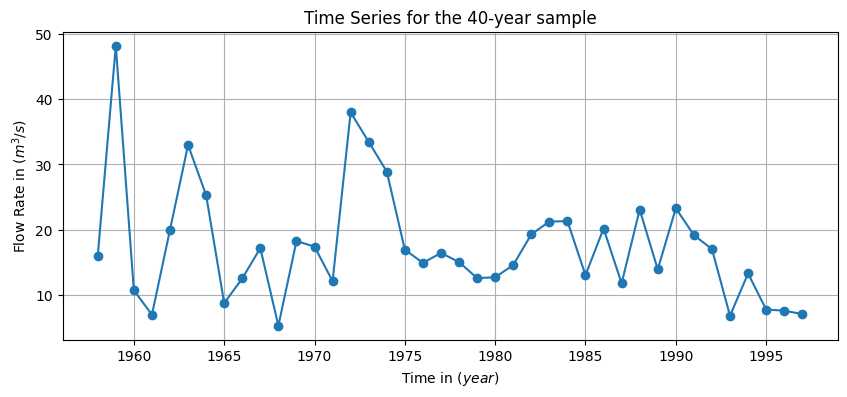

In [122]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(
    data.year.to_numpy(), 
    data.flow_rate.to_numpy(),
    '-o'
    )

ax.grid(visible=True)
ax.set_title(label='Time Series for the {}-year sample'.format(len(data)))
ax.set_xlabel(xlabel='Time in ($year$)')
ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
fig.savefig(fname='{}time_series_40_year_sample.png'.format(output_dir))

# data case 1

In [123]:
data_c1 = [data.iloc[data[data.year == ind[0]].index[0]:data[data.year == ind[1]].index[0]] for ind in case_1]
ind_ini = [ind[0] for ind in case_1]
ind_fin = [ind[-1]-1 for ind in case_1]
ind_enu = range(len(data_c1))
[ind1.to_csv(
    path_or_buf='{}data_case_1_{}_{}_{}.csv'.format(output_dir, ind2, ind3, ind4),
    header=False,
    index=False
    ) for ind1, ind2, ind3, ind4 in zip(data_c1, ind_enu, ind_ini, ind_fin)]

data_c1

[    year  flow_rate
 2   1960      10.75
 3   1961       7.01
 4   1962      19.99
 5   1963      32.97
 6   1964      25.30
 7   1965       8.79
 8   1966      12.56
 9   1967      17.20
 10  1968       5.33
 11  1969      18.26
 12  1970      17.44,
     year  flow_rate
 12  1970      17.44
 13  1971      12.14
 14  1972      37.97
 15  1973      33.45
 16  1974      28.91
 17  1975      16.96
 18  1976      14.94
 19  1977      16.46
 20  1978      15.07
 21  1979      12.61
 22  1980      12.74,
     year  flow_rate
 22  1980      12.74
 23  1981      14.61
 24  1982      19.31
 25  1983      21.26
 26  1984      21.33
 27  1985      13.07
 28  1986      20.20
 29  1987      11.81
 30  1988      23.10
 31  1989      13.94
 32  1990      23.30]

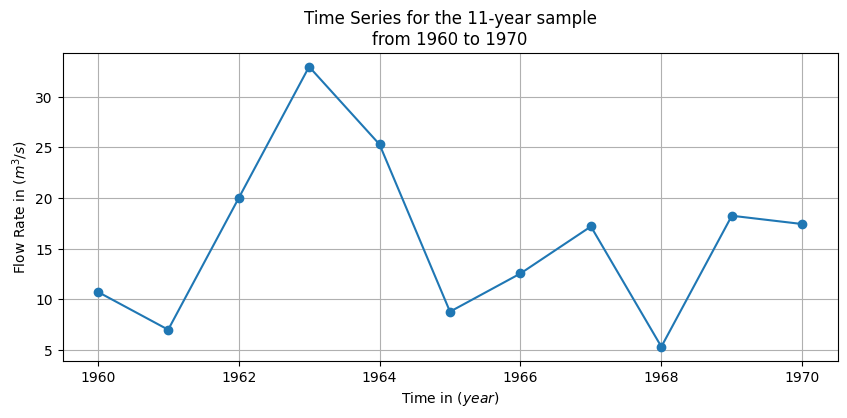

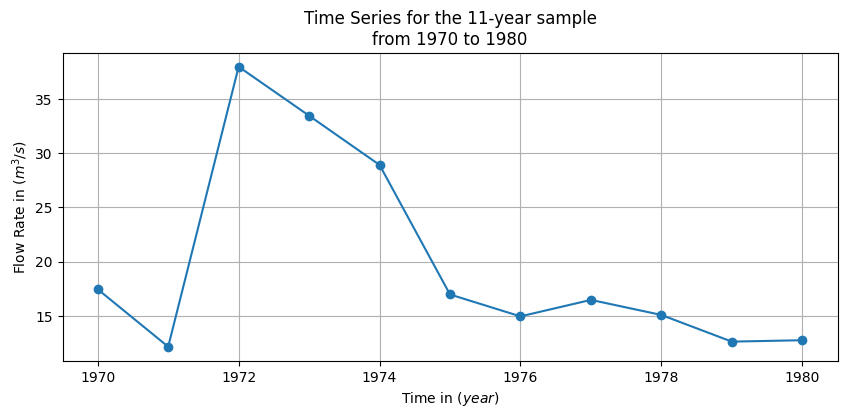

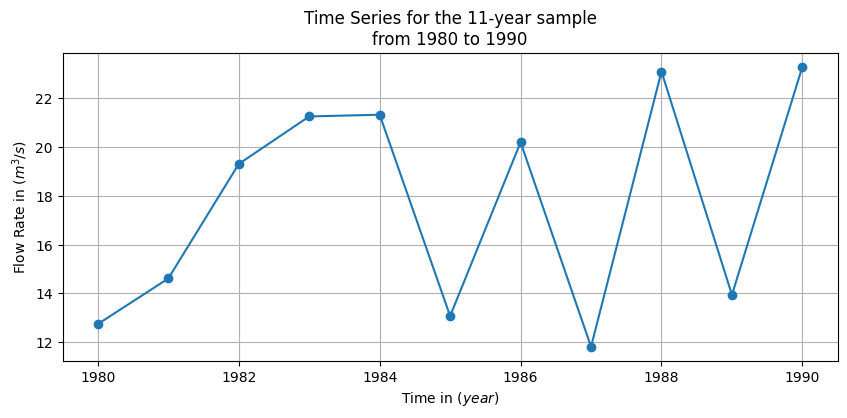

In [124]:
for ind1, ind2, ind3 in zip(data_c1, ind_ini, ind_fin):
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(
        ind1.year.to_numpy(), 
        ind1.flow_rate.to_numpy(),
        '-o'
        )

    ax.grid(visible=True)
    ax.set_title(label='Time Series for the {}-year sample\nfrom {} to {}'.format(
        len(ind1),
        ind2, 
        ind3
        ))
    ax.set_xlabel(xlabel='Time in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}time_series_case_1_{}_year_sample_{}_{}.png'.format(
        output_dir, 
        len(ind1), 
        ind2, 
        ind3
        ))

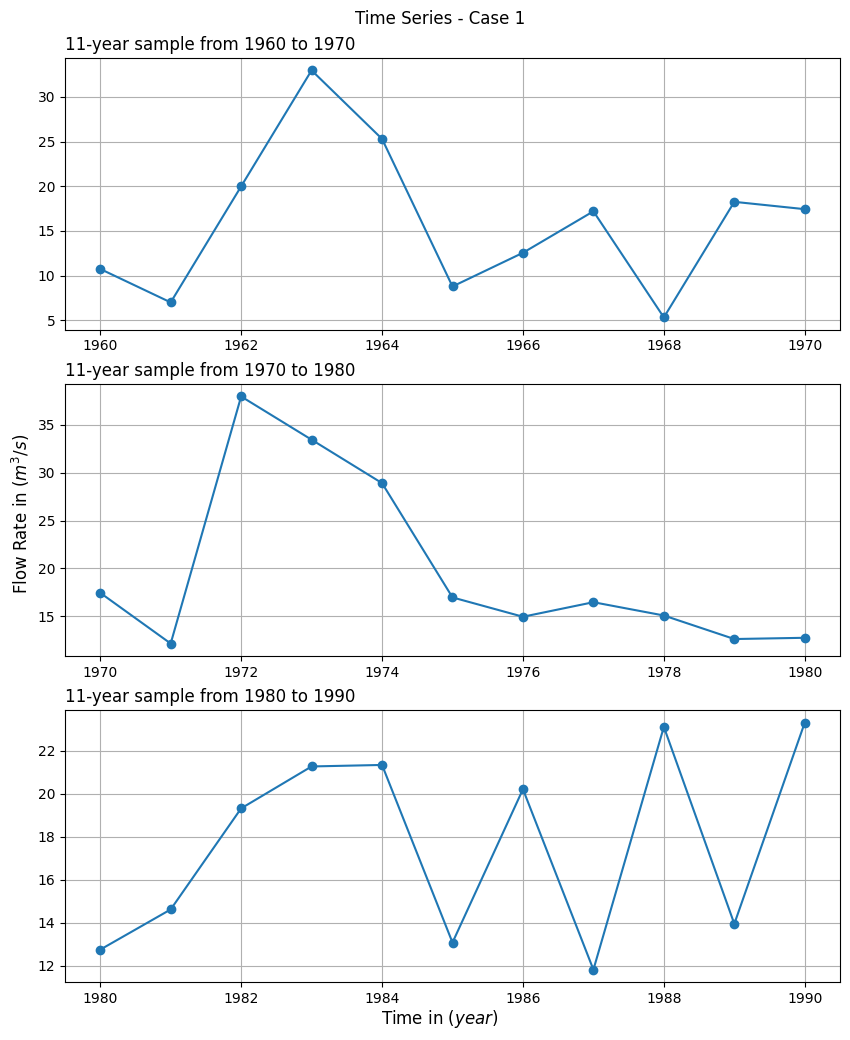

In [125]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

ax[0].plot(
    data_c1[0].year.to_numpy(), 
    data_c1[0].flow_rate.to_numpy(),
    '-o'
    )

ax[0].grid(visible=True)
ax[0].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c1[0]), ind_ini[0], ind_fin[0]),
    loc='left'
    )

ax[1].plot(
    data_c1[1].year.to_numpy(), 
    data_c1[1].flow_rate.to_numpy(),
    '-o'
    )

ax[1].grid(visible=True)
ax[1].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c1[1]), ind_ini[1], ind_fin[1]),
    loc='left'
    )

ax[2].plot(
    data_c1[2].year.to_numpy(), 
    data_c1[2].flow_rate.to_numpy(),
    '-o'
    )

ax[2].grid(visible=True)
ax[2].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c1[2]), ind_ini[2], ind_fin[2]),
    loc='left'
    )

fig.suptitle(t='Time Series - Case 1', x=0.5, y=0.92)
fig.supxlabel(t='Time in ($year$)', x=0.5, y=0.07)
fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.07, y=0.5)

fig.savefig(fname='{}time_series_case_1.png'.format(
    output_dir, 
    ))

In [126]:
data_c1 = pd.concat(objs=[ind.reset_index(drop=True) for ind in data_c1], axis=1)
_ = []
for ind1, ind2 in zip(ind_ini, ind_fin):
    _.append('{}_{}'.format(ind1, ind2))
    _.append('{}_{}'.format(ind1, ind2))
data_c1.columns = pd.MultiIndex.from_tuples(tuples=[(ind1, ind2) for ind1, ind2 in zip(_, data_c1.columns)])
data_c1.to_csv(path_or_buf='{}data_case_1.csv'.format(output_dir), header=True, index=True)

data_c1

1960_1970           1970_1980           1980_1990          
        year flow_rate      year flow_rate      year flow_rate
0       1960     10.75      1970     17.44      1980     12.74
1       1961      7.01      1971     12.14      1981     14.61
2       1962     19.99      1972     37.97      1982     19.31
3       1963     32.97      1973     33.45      1983     21.26
4       1964     25.30      1974     28.91      1984     21.33
5       1965      8.79      1975     16.96      1985     13.07
6       1966     12.56      1976     14.94      1986     20.20
7       1967     17.20      1977     16.46      1987     11.81
8       1968      5.33      1978     15.07      1988     23.10
9       1969     18.26      1979     12.61      1989     13.94
10      1970     17.44      1980     12.74      1990     23.30

# data case 2

In [128]:
data_c2 = [data.iloc[data[data.year == ind[0]].index[0]:data[data.year == ind[1]].index[0]] for ind in case_2]
ind_ini = [ind[0] for ind in case_2]
ind_fin = [ind[-1]-1 for ind in case_2]
ind_enu = range(len(data_c2))
[ind1.to_csv(
    path_or_buf='{}data_case_2_{}_{}_{}.csv'.format(output_dir, ind2, ind3, ind4),
    header=False,
    index=False
    ) for ind1, ind2, ind3, ind4 in zip(data_c2, ind_enu, ind_ini, ind_fin)]

data_c2

[    year  flow_rate
 2   1960      10.75
 3   1961       7.01
 4   1962      19.99
 5   1963      32.97
 6   1964      25.30
 7   1965       8.79
 8   1966      12.56
 9   1967      17.20
 10  1968       5.33
 11  1969      18.26,
     year  flow_rate
 12  1970      17.44
 13  1971      12.14
 14  1972      37.97
 15  1973      33.45
 16  1974      28.91
 17  1975      16.96
 18  1976      14.94
 19  1977      16.46
 20  1978      15.07
 21  1979      12.61,
     year  flow_rate
 22  1980      12.74
 23  1981      14.61
 24  1982      19.31
 25  1983      21.26
 26  1984      21.33
 27  1985      13.07
 28  1986      20.20
 29  1987      11.81
 30  1988      23.10
 31  1989      13.94]

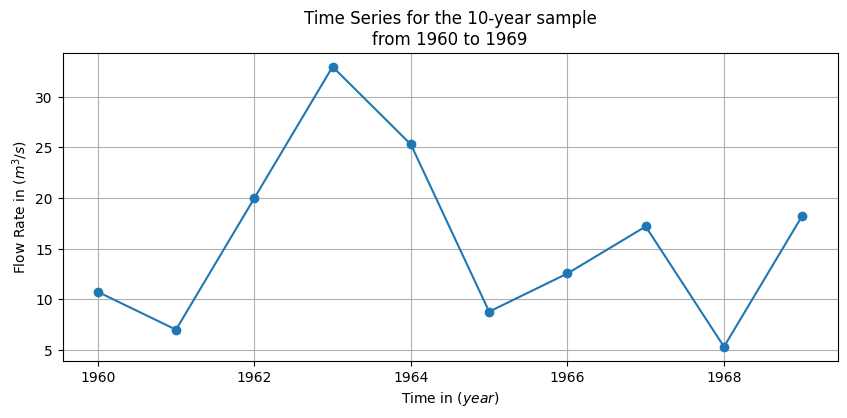

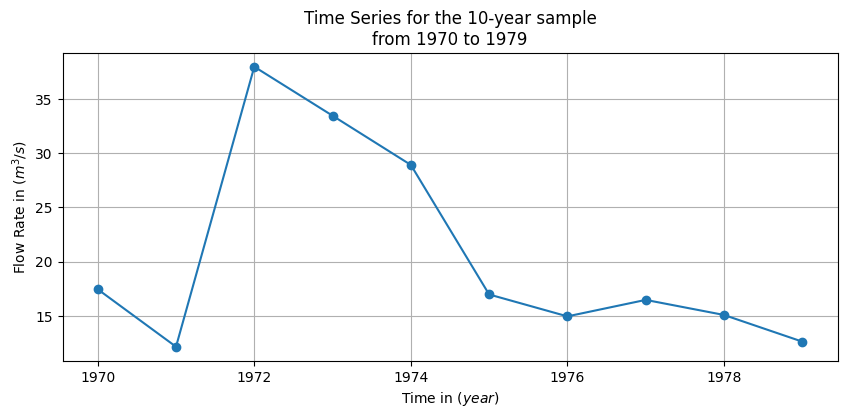

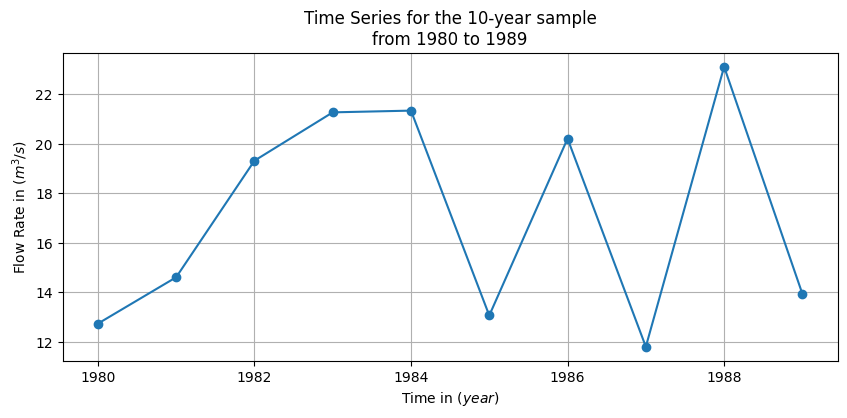

In [129]:
for ind1, ind2, ind3 in zip(data_c2, ind_ini, ind_fin):
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(
        ind1.year.to_numpy(), 
        ind1.flow_rate.to_numpy(),
        '-o'
        )

    ax.grid(visible=True)
    ax.set_title(label='Time Series for the {}-year sample\nfrom {} to {}'.format(
        len(ind1),
        ind2, 
        ind3
        ))
    ax.set_xlabel(xlabel='Time in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}time_series_case_2_{}_year_sample_{}_{}.png'.format(
        output_dir, 
        len(ind1), 
        ind2, 
        ind3
        ))

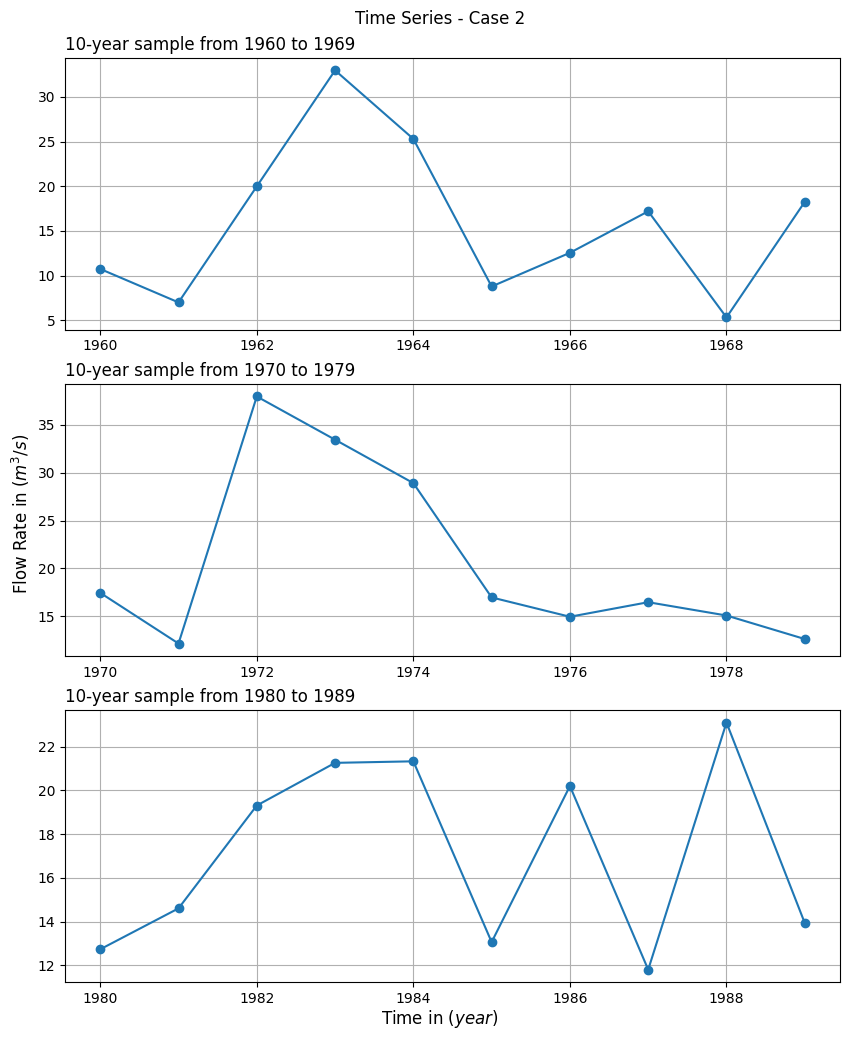

In [130]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

ax[0].plot(
    data_c2[0].year.to_numpy(), 
    data_c2[0].flow_rate.to_numpy(),
    '-o'
    )

ax[0].grid(visible=True)
ax[0].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c2[0]), ind_ini[0], ind_fin[0]),
    loc='left'
    )

ax[1].plot(
    data_c2[1].year.to_numpy(), 
    data_c2[1].flow_rate.to_numpy(),
    '-o'
    )

ax[1].grid(visible=True)
ax[1].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c2[1]), ind_ini[1], ind_fin[1]),
    loc='left'
    )

ax[2].plot(
    data_c2[2].year.to_numpy(), 
    data_c2[2].flow_rate.to_numpy(),
    '-o'
    )

ax[2].grid(visible=True)
ax[2].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c2[2]), ind_ini[2], ind_fin[2]),
    loc='left'
    )

fig.suptitle(t='Time Series - Case 2', x=0.5, y=0.92)
fig.supxlabel(t='Time in ($year$)', x=0.5, y=0.07)
fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.07, y=0.5)

fig.savefig(fname='{}time_series_case_2.png'.format(
    output_dir, 
    ))

In [131]:
data_c2 = pd.concat(objs=[ind.reset_index(drop=True) for ind in data_c2], axis=1)
_ = []
for ind1, ind2 in zip(ind_ini, ind_fin):
    _.append('{}_{}'.format(ind1, ind2))
    _.append('{}_{}'.format(ind1, ind2))
data_c2.columns = pd.MultiIndex.from_tuples(tuples=[(ind1, ind2) for ind1, ind2 in zip(_, data_c2.columns)])
data_c2.to_csv(path_or_buf='{}data_case_2.csv'.format(output_dir), header=True, index=True)

data_c2

1960_1969           1970_1979           1980_1989          
       year flow_rate      year flow_rate      year flow_rate
0      1960     10.75      1970     17.44      1980     12.74
1      1961      7.01      1971     12.14      1981     14.61
2      1962     19.99      1972     37.97      1982     19.31
3      1963     32.97      1973     33.45      1983     21.26
4      1964     25.30      1974     28.91      1984     21.33
5      1965      8.79      1975     16.96      1985     13.07
6      1966     12.56      1976     14.94      1986     20.20
7      1967     17.20      1977     16.46      1987     11.81
8      1968      5.33      1978     15.07      1988     23.10
9      1969     18.26      1979     12.61      1989     13.94

# data case 3

In [132]:
data_c3 = [data.iloc[data[data.year == ind[0]].index[0]:data[data.year == ind[1]].index[0]] for ind in case_3]
ind_ini = [ind[0] for ind in case_3]
ind_fin = [ind[-1]-1 for ind in case_3]
ind_enu = range(len(data_c3))
[ind1.to_csv(
    path_or_buf='{}data_case_3_{}_{}_{}.csv'.format(output_dir, ind2, ind3, ind4),
    header=False,
    index=False
    ) for ind1, ind2, ind3, ind4 in zip(data_c3, ind_enu, ind_ini, ind_fin)]

data_c3

[    year  flow_rate
 3   1961       7.01
 4   1962      19.99
 5   1963      32.97
 6   1964      25.30
 7   1965       8.79
 8   1966      12.56
 9   1967      17.20
 10  1968       5.33
 11  1969      18.26
 12  1970      17.44,
     year  flow_rate
 13  1971      12.14
 14  1972      37.97
 15  1973      33.45
 16  1974      28.91
 17  1975      16.96
 18  1976      14.94
 19  1977      16.46
 20  1978      15.07
 21  1979      12.61
 22  1980      12.74,
     year  flow_rate
 23  1981      14.61
 24  1982      19.31
 25  1983      21.26
 26  1984      21.33
 27  1985      13.07
 28  1986      20.20
 29  1987      11.81
 30  1988      23.10
 31  1989      13.94
 32  1990      23.30]

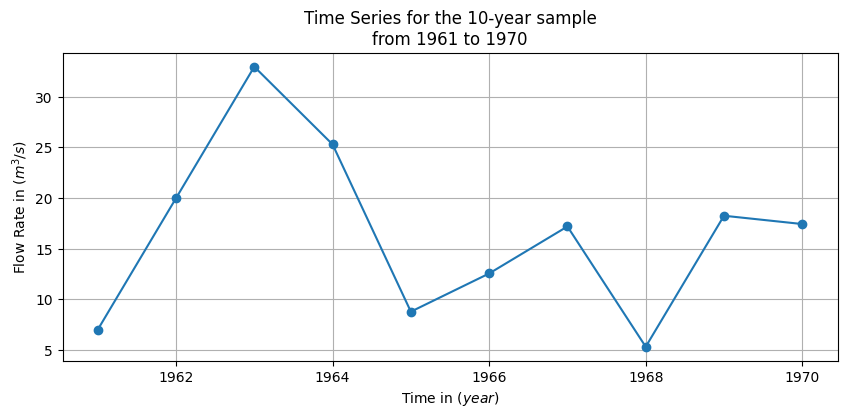

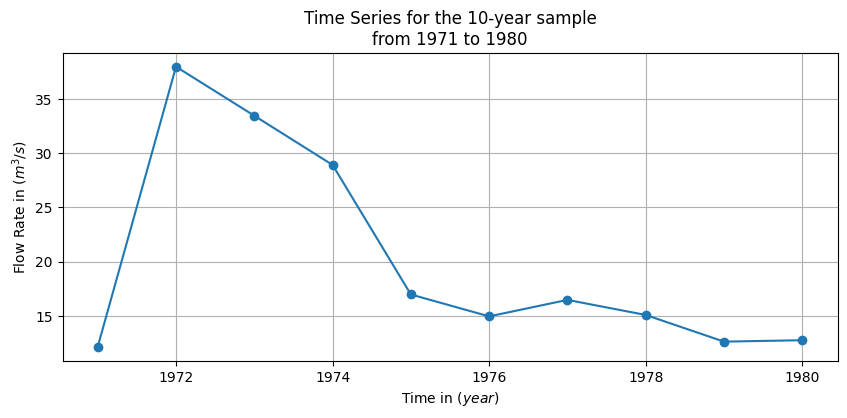

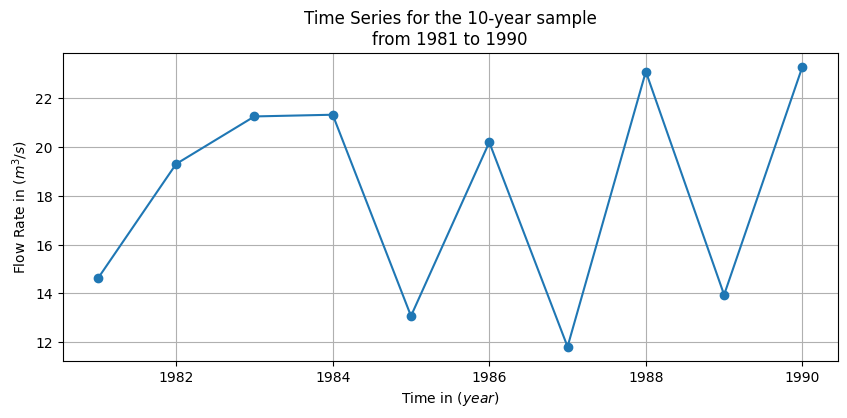

In [133]:
for ind1, ind2, ind3 in zip(data_c3, ind_ini, ind_fin):
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(
        ind1.year.to_numpy(), 
        ind1.flow_rate.to_numpy(),
        '-o'
        )

    ax.grid(visible=True)
    ax.set_title(label='Time Series for the {}-year sample\nfrom {} to {}'.format(
        len(ind1),
        ind2, 
        ind3
        ))
    ax.set_xlabel(xlabel='Time in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}time_series_case_3_{}_year_sample_{}_{}.png'.format(
        output_dir, 
        len(ind1), 
        ind2, 
        ind3
        ))

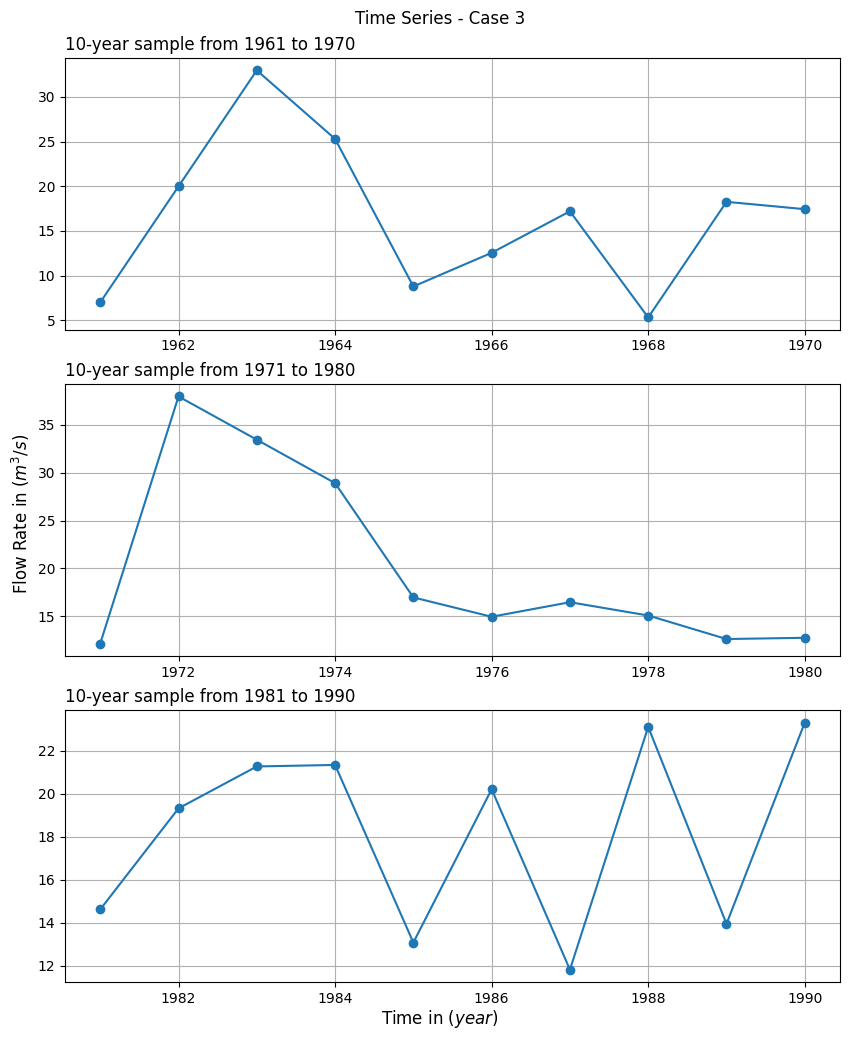

In [134]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

ax[0].plot(
    data_c3[0].year.to_numpy(), 
    data_c3[0].flow_rate.to_numpy(),
    '-o'
    )

ax[0].grid(visible=True)
ax[0].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c3[0]), ind_ini[0], ind_fin[0]),
    loc='left'
    )

ax[1].plot(
    data_c3[1].year.to_numpy(), 
    data_c3[1].flow_rate.to_numpy(),
    '-o'
    )

ax[1].grid(visible=True)
ax[1].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c3[1]), ind_ini[1], ind_fin[1]),
    loc='left'
    )

ax[2].plot(
    data_c3[2].year.to_numpy(), 
    data_c3[2].flow_rate.to_numpy(),
    '-o'
    )

ax[2].grid(visible=True)
ax[2].set_title(
    label='{}-year sample from {} to {}'.format(len(data_c3[2]), ind_ini[2], ind_fin[2]),
    loc='left'
    )

fig.suptitle(t='Time Series - Case 3', x=0.5, y=0.92)
fig.supxlabel(t='Time in ($year$)', x=0.5, y=0.07)
fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.07, y=0.5)

fig.savefig(fname='{}time_series_case_3.png'.format(
    output_dir, 
    ))

In [135]:
data_c3 = pd.concat(objs=[ind.reset_index(drop=True) for ind in data_c3], axis=1)
_ = []
for ind1, ind2 in zip(ind_ini, ind_fin):
    _.append('{}_{}'.format(ind1, ind2))
    _.append('{}_{}'.format(ind1, ind2))
data_c3.columns = pd.MultiIndex.from_tuples(tuples=[(ind1, ind2) for ind1, ind2 in zip(_, data_c3.columns)])
data_c3.to_csv(path_or_buf='{}data_case_3.csv'.format(output_dir), header=True, index=True)

data_c3

1961_1970           1971_1980           1981_1990          
       year flow_rate      year flow_rate      year flow_rate
0      1961      7.01      1971     12.14      1981     14.61
1      1962     19.99      1972     37.97      1982     19.31
2      1963     32.97      1973     33.45      1983     21.26
3      1964     25.30      1974     28.91      1984     21.33
4      1965      8.79      1975     16.96      1985     13.07
5      1966     12.56      1976     14.94      1986     20.20
6      1967     17.20      1977     16.46      1987     11.81
7      1968      5.33      1978     15.07      1988     23.10
8      1969     18.26      1979     12.61      1989     13.94
9      1970     17.44      1980     12.74      1990     23.30